In [231]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
style.use('ggplot')
from sklearn import preprocessing, cross_validation

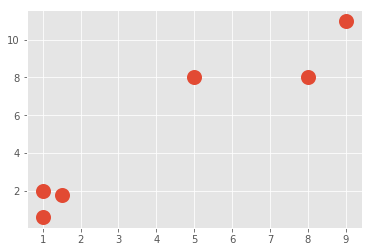

In [232]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

plt.scatter(X[:, 0],X[:, 1], s=100, linewidths = 5, zorder = 10)
plt.show()

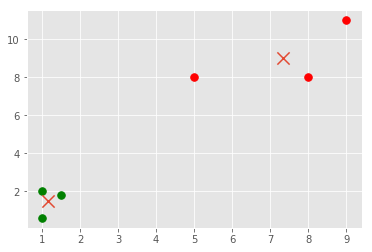

In [233]:
clf = KMeans(n_clusters=2)
clf.fit(X)

centroids = clf.cluster_centers_
labels = clf.labels_

colors = ["g.","r.","c.","y."]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 15)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.show()

In [234]:
df_titanic = pd.read_excel('C:/Users/HP/Downloads/titanic.xls')
#print(df_titanic.head())
df_titanic.drop(['body','name'], 1, inplace=True)
df_titanic.convert_objects(convert_numeric=True)
df_titanic.fillna(0, inplace=True)
#print(df_titanic.head())

def handle_non_numerical_data(df_titanic):
    columns = df_titanic.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df_titanic[column].dtype != np.int64 and df_titanic[column].dtype != np.float64:
            column_contents = df_titanic[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df_titanic[column] = list(map(convert_to_int, df_titanic[column]))

    return df_titanic

df_titanic = handle_non_numerical_data(df_titanic)
print(df_titanic.head())

   pclass  survived  sex      age  sibsp  parch  ticket      fare  cabin  \
0       1         1    0  29.0000      0      0     766  211.3375     84   
1       1         1    1   0.9167      1      2     523  151.5500    120   
2       1         0    0   2.0000      1      2     523  151.5500    120   
3       1         0    1  30.0000      1      2     523  151.5500    120   
4       1         0    0  25.0000      1      2     523  151.5500    120   

   embarked  boat  home.dest  
0         0     2        198  
1         0     1        296  
2         0     0        296  
3         0     0        296  
4         0     0        296  


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [237]:
# specify which Columns you want the model to train on
X = np.array(df_titanic.drop(['survived', 'ticket', 'boat'], 1).astype(float)) 
X = preprocessing.scale(X)

y = np.array(df_titanic['survived'])
clf2=KMeans(n_clusters=2)
clf2.fit(X)

correct=0
for i in range(len(X)):
    predict = np.array(X[i].astype(float))
    predict = predict.reshape(-1, len(predict))
    prediction = clf2.predict(predict)
    
    if prediction==0:
        correct+=1

print(correct/len(X))            

0.2322383498854087


In [239]:
# Using our own K-means cluster Algorithm

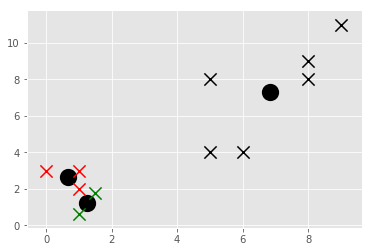

In [301]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11],
                     [1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

#plt.scatter(X[:, 0],X[:, 1], s=100, linewidths = 5, zorder = 10)
#plt.show()

class K_Means:
    def __init__(self,k=2, tol=0.001,max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def fit(self,data):
        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            
            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                #pass
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                #comment to see the initially classified centroid
            
            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    #uncomment to see the percent change of centroids through each iteration
                    optimized = False
                    
            if optimized:
                break       
            
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
#------------------------------------------------- Plotting -------------------------------------------------------    
    
clf_3 = K_Means(k=3)
clf_3.fit(X)

colors=['red','green','black','brown','purple']*2

for centroid in clf_3.centroids:
    plt.scatter(clf_3.centroids[centroid][0], clf_3.centroids[centroid][1],
                marker="o", c="k", s=150, linewidths=5)

for classification in clf_3.classifications:
    color = colors[classification]
    for featureset in clf_3.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], c=color , marker="x", s=150, linewidths=5)
        
plt.show()    

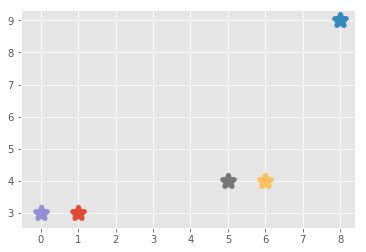

In [265]:
unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf_3.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", s=150, linewidths=5)


plt.show()